### Import Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# set maximum display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

### Read and Understand the data

In [3]:
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
pd.set_option('display.max_rows', None)
100*housing.isnull().sum()[housing.isnull().sum()>0]/len(housing)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# drop the column which has more that 45% of null values
nullcolm=['Alley',"FireplaceQu","PoolQC","Fence","MiscFeature"]
housing.drop(nullcolm,axis=1,inplace=True)

In [7]:
100*housing.isnull().sum()[housing.isnull().sum()>0]/len(housing)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [8]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [9]:
# for "LotFrontage" data is highly biased so need to take the median
median_=housing.LotFrontage.median()
housing.LotFrontage=housing.LotFrontage.fillna(median_)

median_=housing.MasVnrArea.median()
housing.MasVnrArea=housing.MasVnrArea.fillna(median_)

median_=housing.GarageYrBlt.median()
housing.GarageYrBlt=housing.GarageYrBlt.fillna(median_)

In [10]:
catcolm=['BsmtQual','BsmtCond',"BsmtExposure",'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish',"GarageQual","GarageCond","MasVnrType","Electrical"]

for i in catcolm:
    mode_=housing[i].mode()[0]
    housing[i]=housing[i].fillna(mode_)

In [11]:
round(100*housing.isnull().sum()[housing.isnull().sum()>0]/len(housing),2)

Series([], dtype: float64)

In [12]:
housing.shape

(1460, 76)

In [13]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [14]:
# segregate the continuous and categorical veriables

catcol = ['MSSubClass','MSZoning','Street','LotShape','LandContour',"Utilities",'LotConfig',"LandSlope","Neighborhood",'Condition1','Condition2','BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2',"Heating",'HeatingQC','CentralAir', 'Electrical','LowQualFinSF',"BsmtFullBath",'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'GarageType','GarageFinish','GarageCars','GarageQual','GarageCond',
        "PavedDrive",'3SsnPorch','PoolArea','MiscVal',"MoSold","YrSold","SaleType",'SaleCondition']
contcol = ['LotFrontage','LotArea',"YearBuilt",'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',"BsmtUnfSF","TotalBsmtSF",'1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',"ScreenPorch"]

In [15]:
len(catcol)+len(contcol) # + ID + TARGET VERIABLE 

74

In [16]:
housing['MSSubClass'].value_counts()/len(housing['MSSubClass'])*100

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

In [17]:
# Dropped High biased/imbalanced data features(more than 98% of value is specified for only one value)

dropvar=['Id','Street','Utilities','Condition2','RoofMatl','MasVnrType','Heating','LowQualFinSF','KitchenAbvGr','GarageQual','GarageCond','3SsnPorch','PoolArea','MiscVal','BsmtFinSF2','EnclosedPorch','ScreenPorch','BsmtHalfBath','LandSlope']

housing.drop(dropvar,axis=1,inplace=True)

### Check duplicate values

In [18]:
print(housing.duplicated(subset=None, keep='first').count())

housing[housing.duplicated(keep=False)]

1460


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice


##### Observation:

a. No Duplicate values found<br>
b. train data shape also has only 1451 rows so it is observed that there is no duplicate records.

## EDA

In [19]:
# basement columns:
house_Basement = housing[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1",
                         "BsmtUnfSF","TotalBsmtSF"]]

<Figure size 1080x360 with 0 Axes>

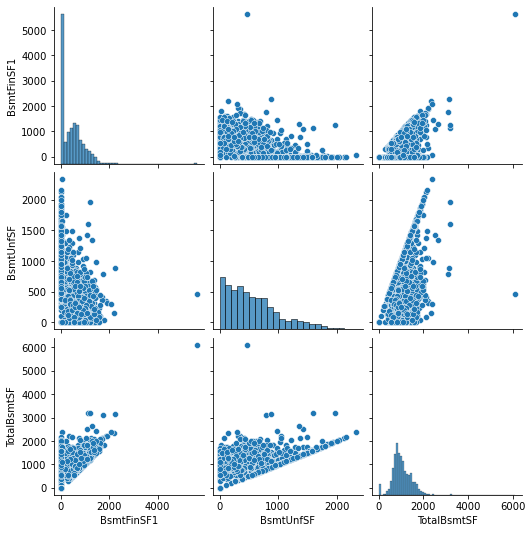

In [20]:
plt.figure(figsize=(15,5))
sns.pairplot(house_Basement)
plt.show()

##### From the plot we can observe that the we can drop "BsmtFinSF1","BsmtUnfSF"

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

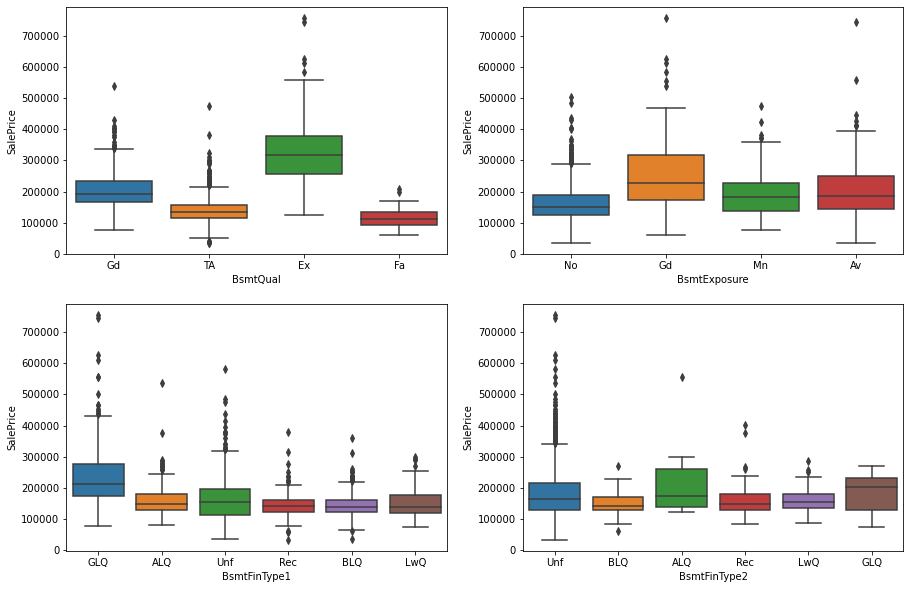

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing)
plt.subplot(2,2,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = housing)
plt.subplot(2,2,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = housing)

##### We can drop 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure' as they dont havemuch influence on sales price.

In [22]:
basementcol= ["BsmtFinSF1","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
housing.drop(basementcol,1,inplace=True)

In [23]:
housing.shape

(1460, 52)

In [24]:
# imputing MasVnrArea column null values

housing["MasVnrArea"] = housing["MasVnrArea"].replace(np.nan, housing["MasVnrArea"].median())
housing["MasVnrArea"] = housing["MasVnrArea"].astype('int')

###### Bucketing for categorical columns ( Column which contains less percentage of value will bucket for better visialisation and preperation)

In [25]:
housing.MSZoning.value_counts()/len(housing.MSZoning)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [26]:
housing['MSZoning']=housing['MSZoning'].replace(['FV','RH','C (all)'],'OtherMSZoning')
housing['LotShape']=housing['LotShape'].replace(['IR2','IR3'],'Slight/ModrtlyIrregular')
housing['LandContour']=housing['LandContour'].replace(['Bnk','HLS','Low'],'OtherLandCounter')
housing['LotConfig']=housing['LotConfig'].replace(['CulDSac','FR2','FR3'],'OtherLotConfig')
housing['Neighborhood']=housing['Neighborhood'].replace(['Blueste','NPkVill','Veenker','BrDale','Blmngtn','MeadowV','SWISU','ClearCr','Timber','IDOTRR','NoRidge','Mitchel','BrkSide','Crawfor','SawyerW'],'OtherNeighborhood')
housing['Condition1']=housing['Condition1'].replace(['RRNe','Artery','RRAn','PosN','PosA','RRNn','RRAe','Feedr'],'OtherCondition1')
housing['BldgType']=housing['BldgType'].replace(['2fmCon','Twnhs','Duplex','TwnhsE'],'OtherTypeDwell')
housing['HouseStyle']=housing['HouseStyle'].replace(['2.5Fin','2.5Unf','1.5Unf','SFoyer','SLvl'],'OtherHouseStyle')
housing['RoofStyle']=housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'OtherRoofStyle')
housing['Exterior1st']=housing['Exterior1st'].replace(['CBlock','ImStucc','AsphShn','Stone','BrkComm','AsbShng','Stucco','WdShing','BrkFace','CemntBd'],'OtherExterior1')
housing['Exterior2nd']=housing['Exterior2nd'].replace(['CBlock','Other','ImStucc','AsphShn','Stone','Brk Cmn','BrkFace','AsbShng','Stucco','Wd Shng','CemntBd','Plywood','CmentBd'],'OtherExterior2metals')
housing['ExterQual']=housing['ExterQual'].replace(['Fa','Ex'],'Excellent/FairQual')
housing['ExterCond']=housing['ExterCond'].replace(['Fa','Ex','Po'],'Excellent/Fair/PoorCond')
housing['Foundation']=housing['Foundation'].replace(['Slab','Stone','Wood'],'OtherFoundation')
housing['BsmtCond']=housing['BsmtCond'].replace(['Gd','Fa','Po'],'Good/Fair/PoorBsmtCond')
housing['HeatingQC']=housing['HeatingQC'].replace(['Fa','Po'],'OtherHeatingQC')
housing['Electrical']=housing['Electrical'].replace(['FuseA','FuseP','FuseF','Mix'],'OtherElectrical')
housing['BsmtFullBath']=housing['BsmtFullBath'].replace([2,3],'3/2BsmtFullBath')
housing['FullBath']=housing['FullBath'].replace([0,3],'0/3FullBath')
housing['BedroomAbvGr']=housing['BedroomAbvGr'].replace([1,5,6,0,8],'OtherBedroomAbvGr')
housing['TotRmsAbvGrd']=housing['TotRmsAbvGrd'].replace([4,9,10,11,3,12,2,4],'OtherTotRmsAbvGrd')
housing['Functional']=housing['Functional'].replace(['Min1','Min2','Mod','Maj1','Maj2','Sev'],'OtherFunctional')
housing['Fireplaces']=housing['Fireplaces'].replace([2,3],'2/3Fireplaces')
housing['GarageType']=housing['GarageType'].replace(['BuiltIn','Basment','CarPort','2Types'],'OtherGarageType')
housing['PavedDrive']=housing['PavedDrive'].replace(['N','P'],'Dirt/PartialPavedDrive')

In [27]:
#Categorical and continuous columns after data cleaning

catcol = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig',"Neighborhood",'Condition1','BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle', 'Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','HeatingQC','CentralAir', 'Electrical',"BsmtFullBath", 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'GarageType','GarageFinish','GarageCars',
        "PavedDrive","MoSold","YrSold","SaleType",'SaleCondition']
contcol = ['LotFrontage','LotArea',"YearBuilt",'YearRemodAdd','MasVnrArea',"TotalBsmtSF",'1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']

In [28]:
numerical=housing.select_dtypes(exclude=["object"])
categorical=housing.select_dtypes(include=["object"])

In [29]:
print(numerical.columns)
print(categorical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'HalfBath', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


### Univariant Analysis

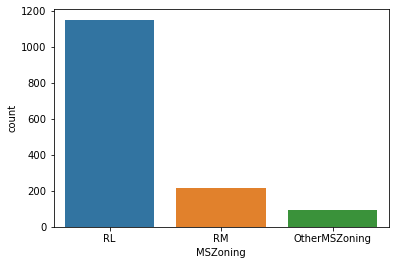

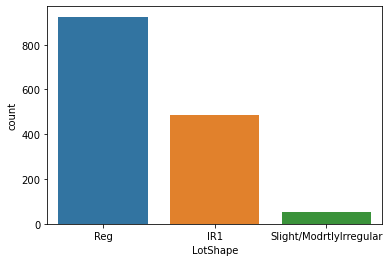

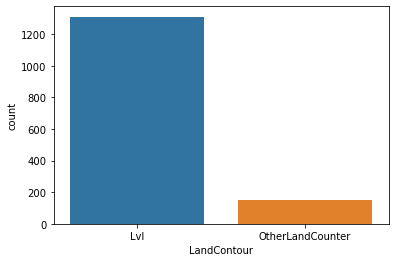

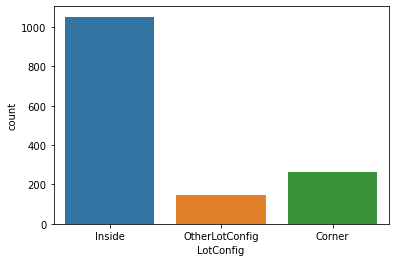

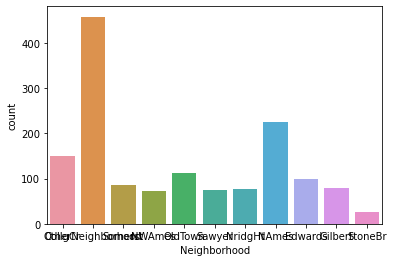

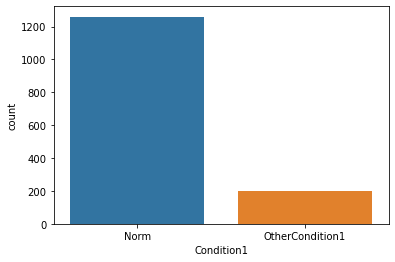

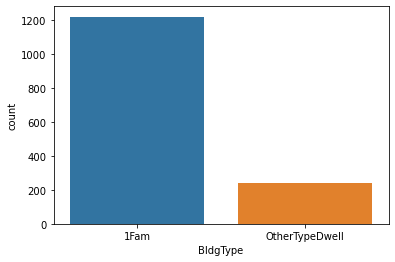

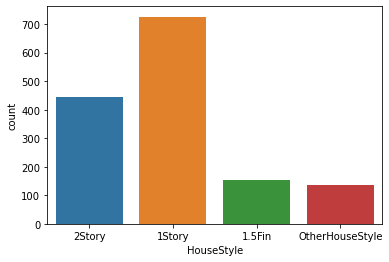

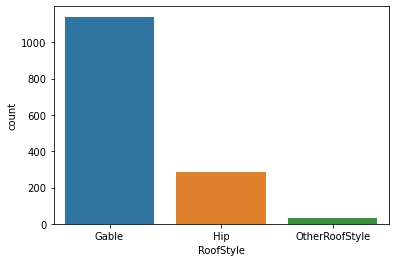

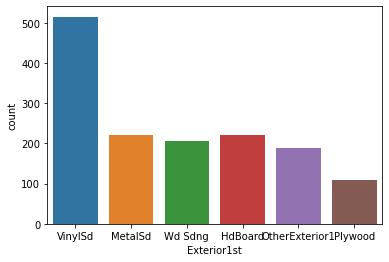

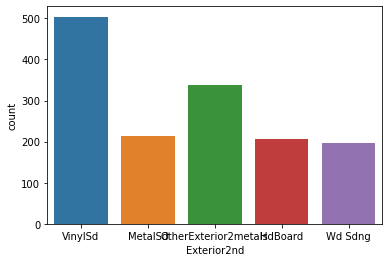

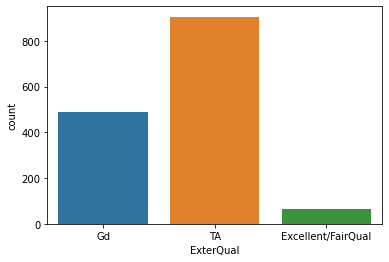

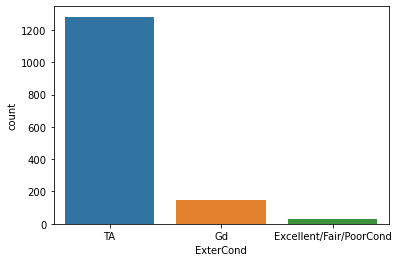

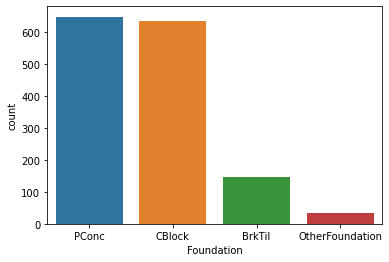

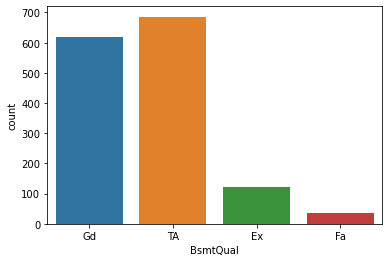

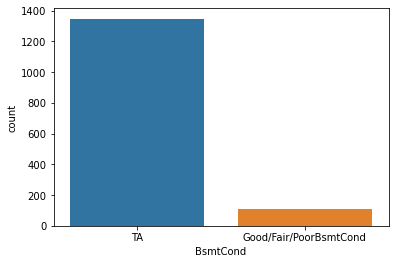

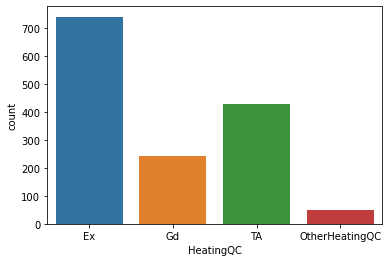

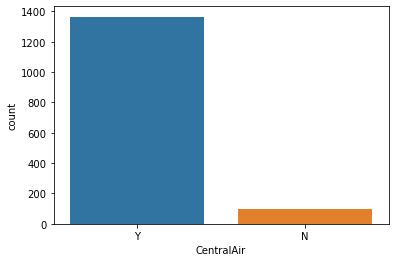

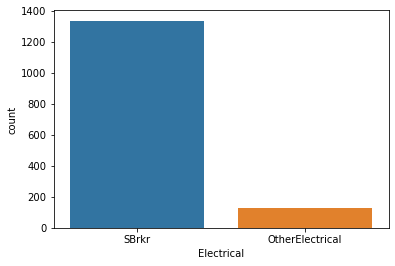

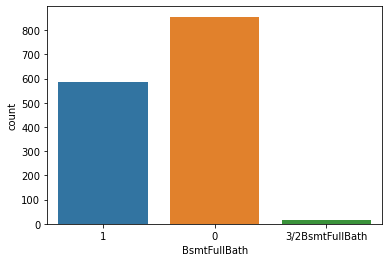

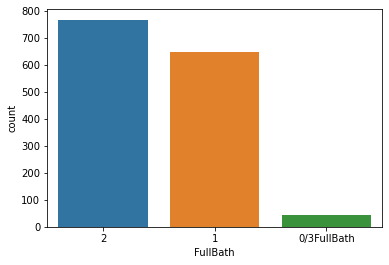

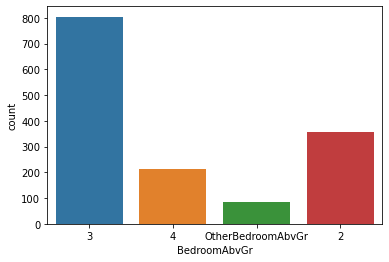

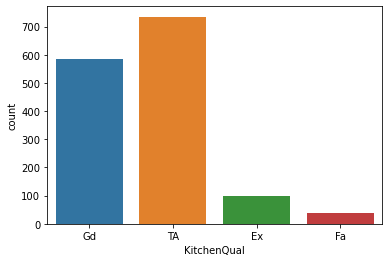

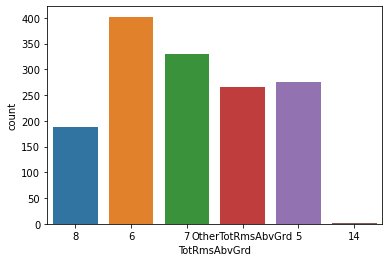

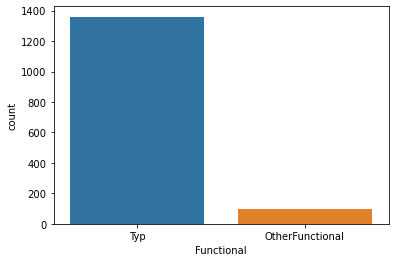

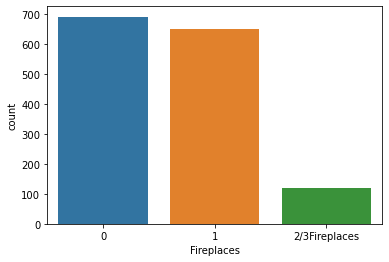

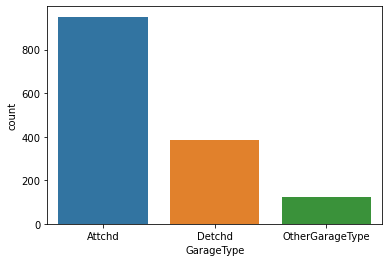

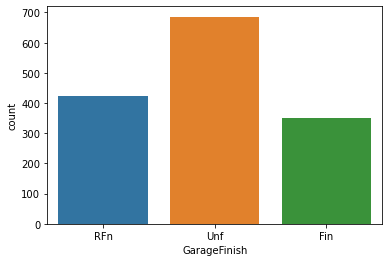

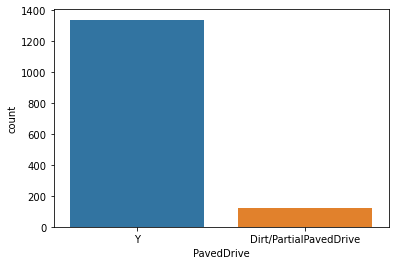

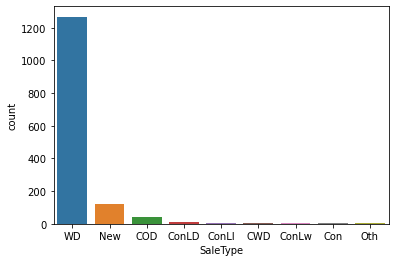

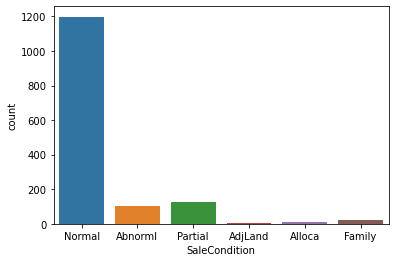

In [30]:
for i in categorical:
    sns.countplot(housing[i])
    plt.show()

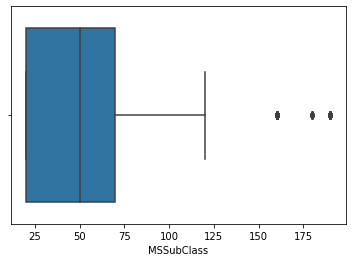

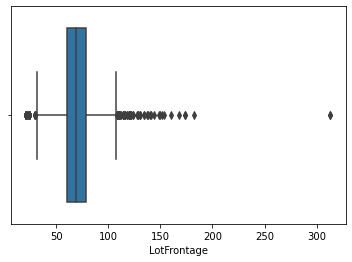

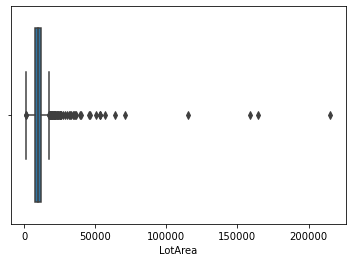

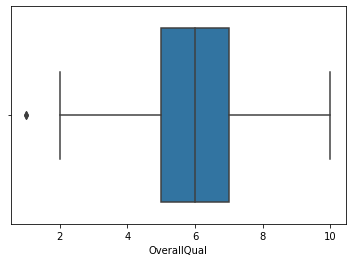

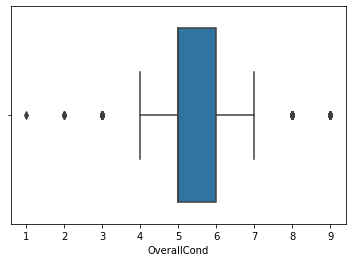

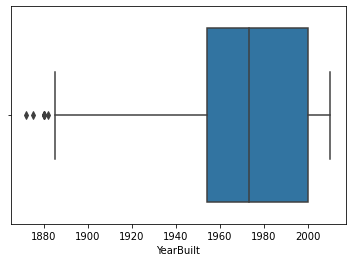

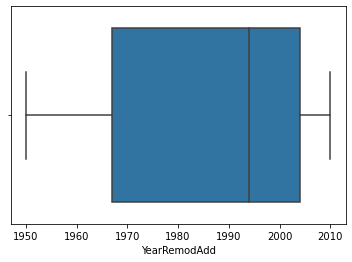

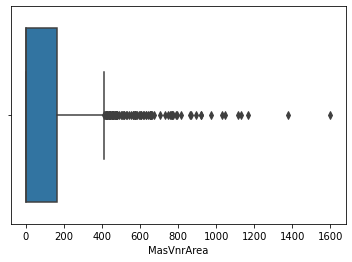

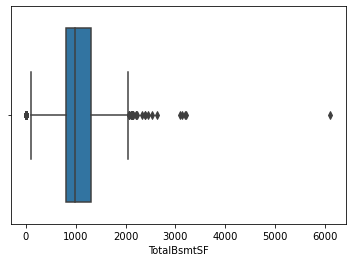

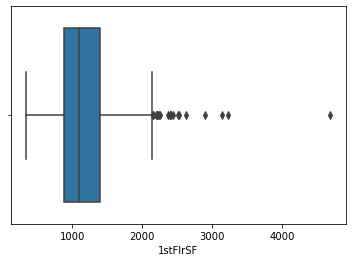

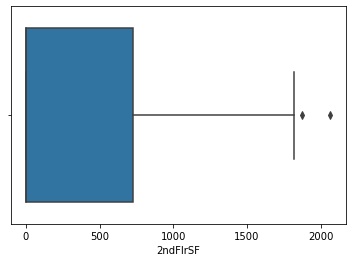

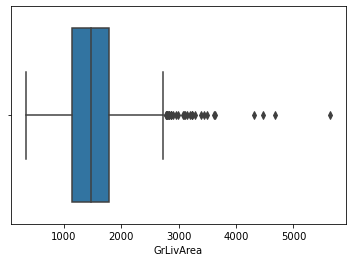

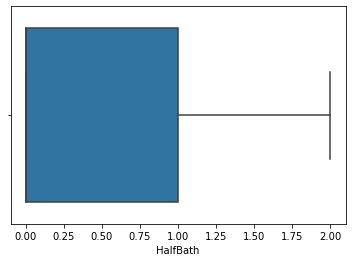

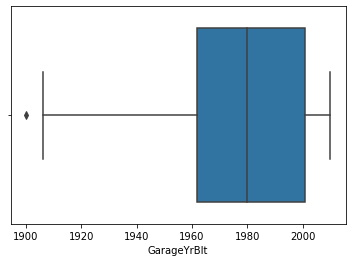

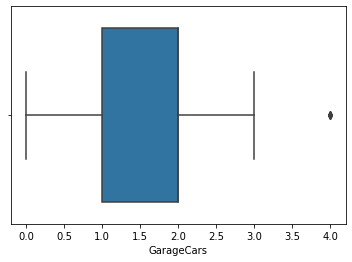

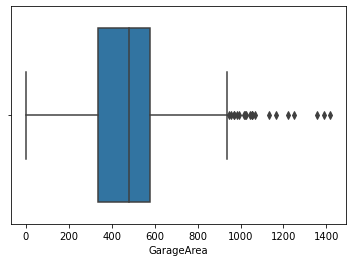

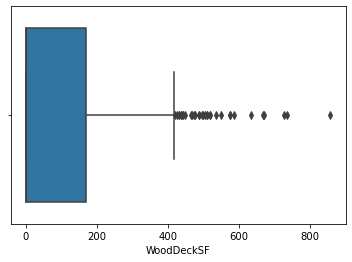

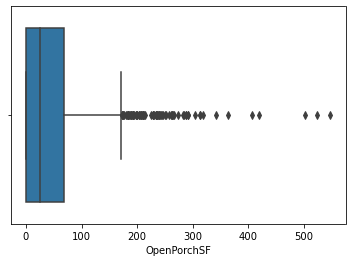

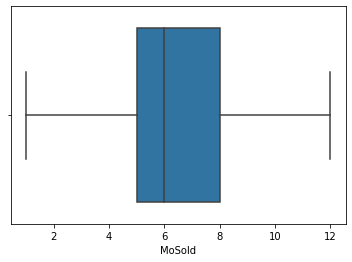

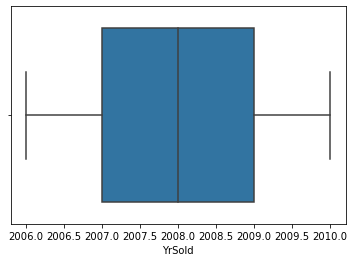

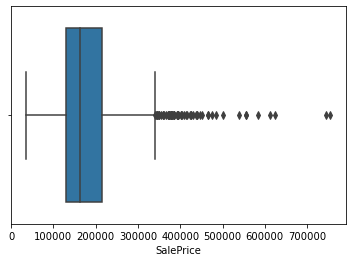

In [31]:
for i in numerical:
    sns.boxplot(housing[i])
    plt.show()

### Bivariant Analysis

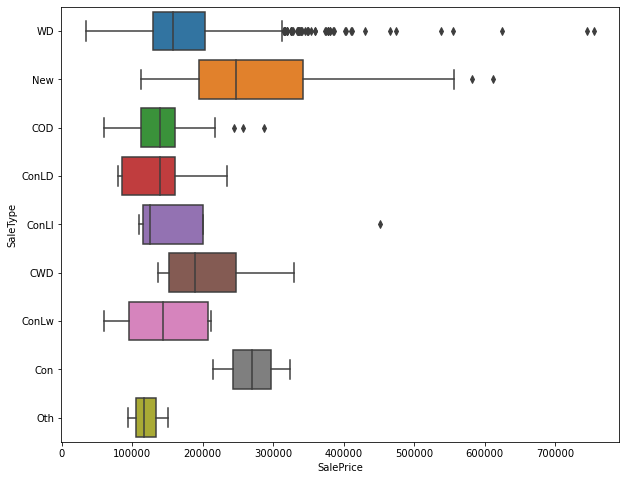

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x="SalePrice",y="SaleType",data=housing)
plt.show()

##### Observation:
    
a. Maximum sale price is from 'Home just constructed and sale' type <br>
b. 'Court Officer Deed' and 'Contract Low Down' type of sales's median is almost same

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

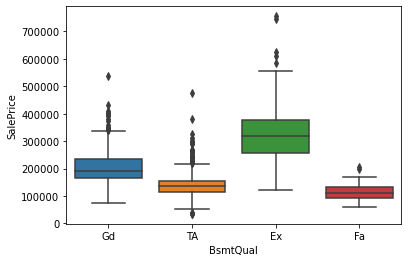

In [33]:
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing)

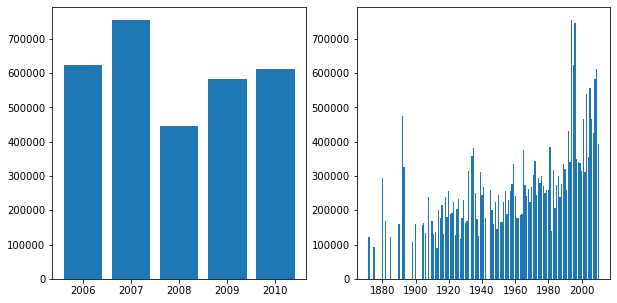

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(housing.YrSold, housing.SalePrice)
plt.subplot(1,2,2)
plt.bar(housing.YearBuilt, housing.SalePrice)
plt.show()

##### Observation:

1. Maximum appartment sold out happend on 2007 and minimum on 2008.

2. Newly build property has high cost than the old one.


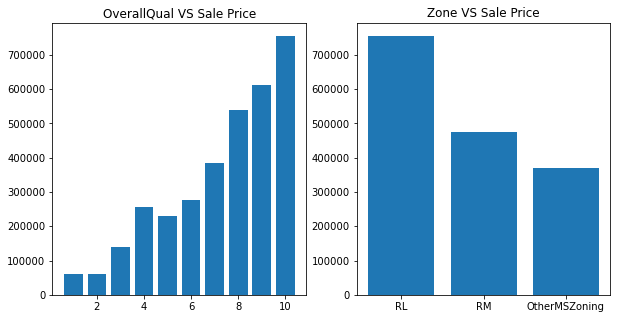

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(housing.OverallQual, housing.SalePrice)
plt.title('OverallQual VS Sale Price')
plt.subplot(1,2,2)
plt.bar(housing.MSZoning, housing.SalePrice)
plt.title('Zone VS Sale Price')
plt.show()

##### Observation:
    
a. As we know maximum price will get for best quality here the story is same. <br>
b. But maximum number of sold done for average quality finished houses <br>
b. More over maximum price for Residential Low Density zone and then for Residential Medium Density zone

### Analysing Garage columns

In [36]:
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
housing["GarageYrBlt"] = housing["GarageYrBlt"].fillna(0)

In [37]:
housing["GarageType"] = housing["GarageType"].astype('str')
housing["GarageType"] = housing["GarageType"].str.replace("nan", "No Garage")
print(housing["GarageType"].describe())
print(housing["GarageType"].value_counts())
housing['GarageType'].value_counts()/len(housing['GarageType'])*100

count       1460
unique         3
top       Attchd
freq         951
Name: GarageType, dtype: object
Attchd             951
Detchd             387
OtherGarageType    122
Name: GarageType, dtype: int64


Attchd             65.136986
Detchd             26.506849
OtherGarageType     8.356164
Name: GarageType, dtype: float64

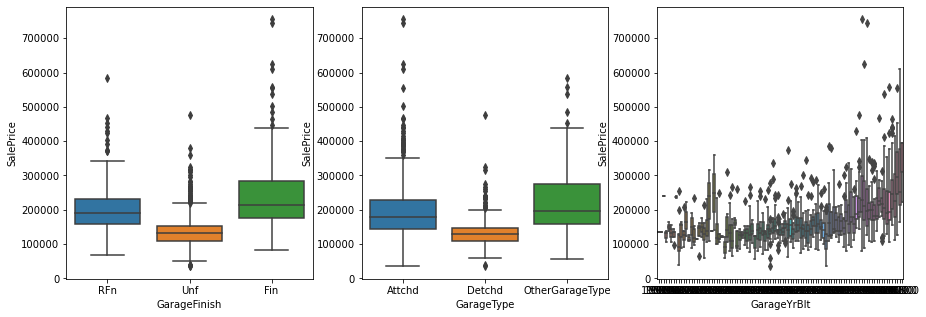

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = housing)
plt.show()

#### Analysing Outlier and treatment 

In [39]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
numerical.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,HalfBath,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,1057.429452,1162.626712,346.992466,1515.463699,0.382877,1978.589041,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,438.705324,386.587738,436.528436,525.480383,0.502885,23.997022,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,1464.000000,0.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,2155.050000,2219.460000,1418.920000,3123.480000,1.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


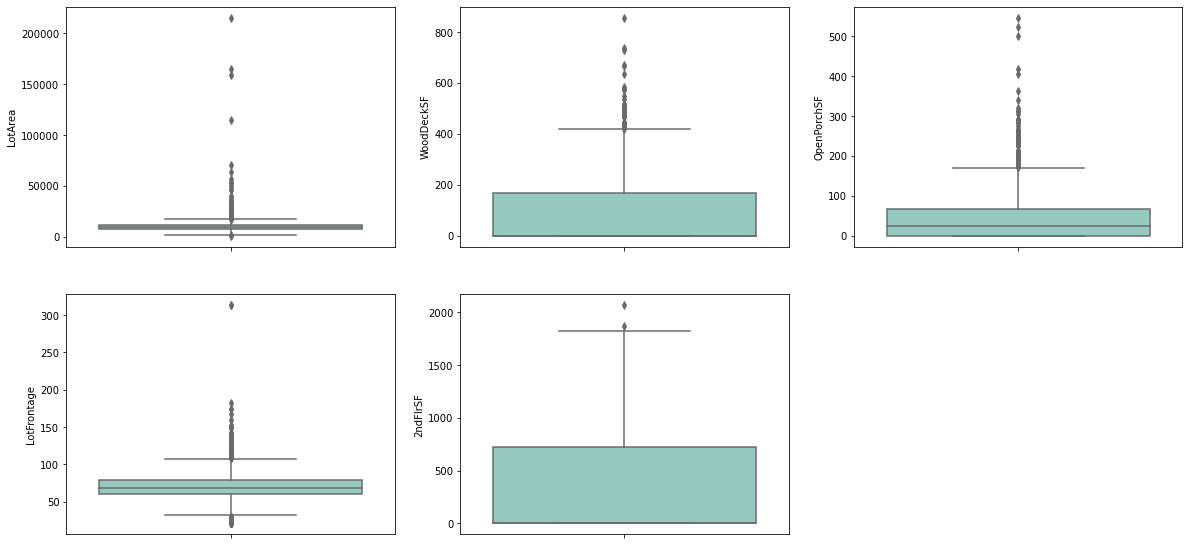

In [40]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = housing)
plt.subplot(3,3,2)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing)
plt.subplot(3,3,3)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing)
plt.subplot(3,3,4)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = housing)
plt.subplot(3,3,5)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = housing)

plt.show()

In [41]:
# Removing Outliers

# Removing values beyond 98% for LotArea
housing = housing[housing["LotArea"] < housing['LotArea'].quantile(0.98)]

# Removing values beyond 99% for WoodDeckSF
housing = housing[housing["WoodDeckSF"] < housing['WoodDeckSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
housing = housing[housing["OpenPorchSF"] < housing['OpenPorchSF'].quantile(0.99)]

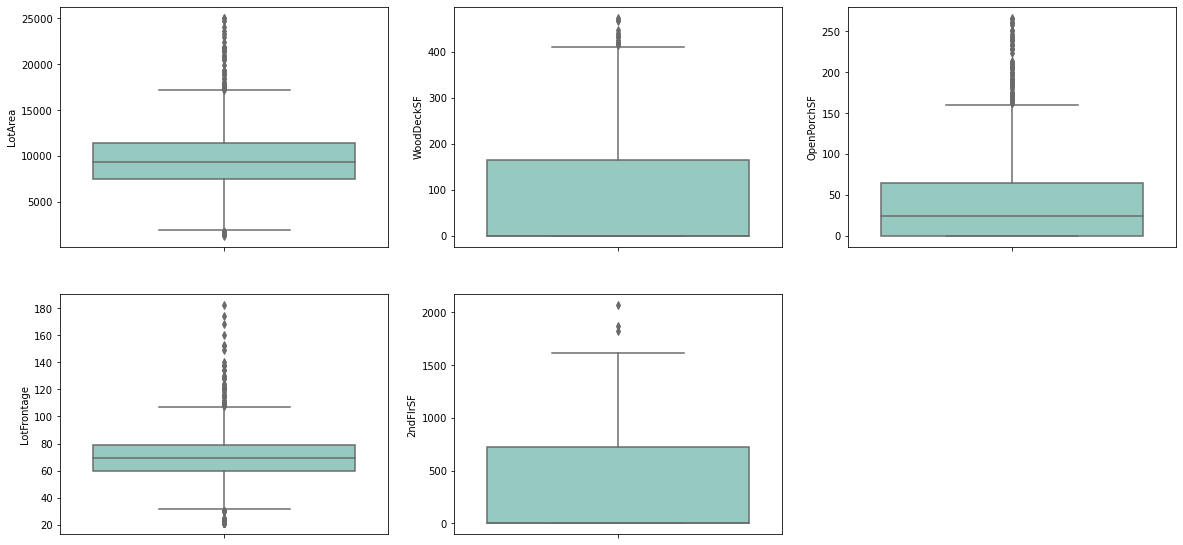

In [42]:
# Checking after treatment

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = housing)
plt.subplot(3,3,2)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing)
plt.subplot(3,3,3)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing)
plt.subplot(3,3,4)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = housing)
plt.subplot(3,3,5)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = housing)

plt.show()

### Correlation for continuous values

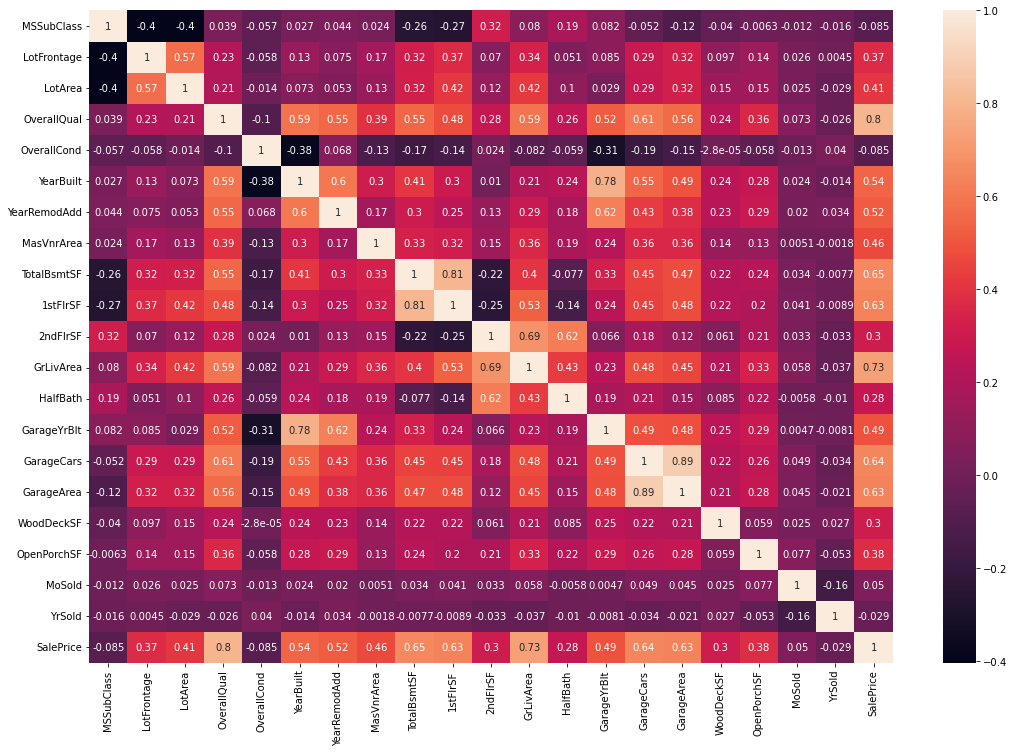

In [43]:
numvar=housing[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice']]
plt.figure(figsize=(18,12))
sns.heatmap(numvar.corr(), annot=True)
plt.show()

In [44]:
# Drop higly correlated features

housing.drop(["GarageCars", "GarageArea","TotalBsmtSF", "1stFlrSF"],axis=1,inplace=True)

In [45]:
housing.shape

(1400, 48)

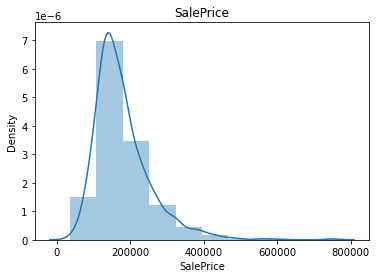

In [46]:
plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

###### The above distribution is skewed. thus we need to transfer the target variable. Here i am using log transfer.

###### Log transformation is most likely the first thing you should do to remove skewness from the predictor.

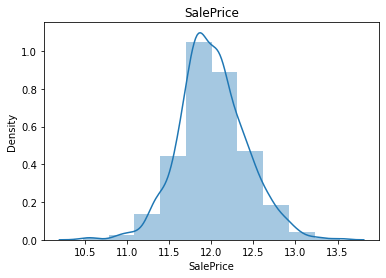

In [47]:
# transform the sales price
housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

In [48]:
housing['SalePrice'].skew()

0.14014024747320286

### Newly Derived Column

In [49]:
housing[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [50]:
# Create a new column named IsRemodelled - This column can determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(checkRemodel, axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,2003.0,RFn,Y,0,61,2,2008,WD,Normal,12.247699,0
1,20,RL,80.0,9600,Reg,Lvl,OtherLotConfig,OtherNeighborhood,OtherCondition1,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0,TA,TA,CBlock,Gd,TA,Ex,Y,SBrkr,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,1976.0,RFn,Y,298,0,5,2007,WD,Normal,12.109016,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,2001.0,RFn,Y,0,42,9,2008,WD,Normal,12.317171,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,OtherNeighborhood,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,OtherExterior2metals,0,TA,TA,BrkTil,TA,Good/Fair/PoorBsmtCond,Gd,Y,SBrkr,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,1998.0,Unf,Y,0,35,2,2006,WD,Abnorml,11.849405,1
4,60,RL,84.0,14260,IR1,Lvl,OtherLotConfig,OtherNeighborhood,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,1053,2198,1,2,1,4,Gd,OtherTotRmsAbvGrd,Typ,1,Attchd,2000.0,RFn,Y,192,84,12,2008,WD,Normal,12.429220,0


In [51]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(funBuiltOrRemodelAge, axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,2003.0,RFn,Y,0,61,2,2008,WD,Normal,12.247699,0,5
1,20,RL,80.0,9600,Reg,Lvl,OtherLotConfig,OtherNeighborhood,OtherCondition1,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0,TA,TA,CBlock,Gd,TA,Ex,Y,SBrkr,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,1976.0,RFn,Y,298,0,5,2007,WD,Normal,12.109016,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,2001.0,RFn,Y,0,42,9,2008,WD,Normal,12.317171,1,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,OtherNeighborhood,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,OtherExterior2metals,0,TA,TA,BrkTil,TA,Good/Fair/PoorBsmtCond,Gd,Y,SBrkr,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,1998.0,Unf,Y,0,35,2,2006,WD,Abnorml,11.849405,1,36
4,60,RL,84.0,14260,IR1,Lvl,OtherLotConfig,OtherNeighborhood,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,1053,2198,1,2,1,4,Gd,OtherTotRmsAbvGrd,Typ,1,Attchd,2000.0,RFn,Y,192,84,12,2008,WD,Normal,12.429220,0,8


In [52]:
# Create a new column which would indicate if the Garage is old or new.
def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(GarageConstructionPeriod)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,2003.0,RFn,Y,0,61,2,2008,WD,Normal,12.247699,0,5,1
1,20,RL,80.0,9600,Reg,Lvl,OtherLotConfig,OtherNeighborhood,OtherCondition1,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0,TA,TA,CBlock,Gd,TA,Ex,Y,SBrkr,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,1976.0,RFn,Y,298,0,5,2007,WD,Normal,12.109016,0,31,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,2001.0,RFn,Y,0,42,9,2008,WD,Normal,12.317171,1,6,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,OtherNeighborhood,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,OtherExterior2metals,0,TA,TA,BrkTil,TA,Good/Fair/PoorBsmtCond,Gd,Y,SBrkr,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,1998.0,Unf,Y,0,35,2,2006,WD,Abnorml,11.849405,1,36,0
4,60,RL,84.0,14260,IR1,Lvl,OtherLotConfig,OtherNeighborhood,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350,Gd,TA,PConc,Gd,TA,Ex,Y,SBrkr,1053,2198,1,2,1,4,Gd,OtherTotRmsAbvGrd,Typ,1,Attchd,2000.0,RFn,Y,192,84,12,2008,WD,Normal,12.429220,0,8,1


In [53]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# we can use the derived columns for further analysis

housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [54]:
housing.shape

(1400, 47)

### Pre-Processing

### Dummy Variable Creation

In [55]:
categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [56]:
#HeatingQC,BsmtQual,KitchenQual,ExterCond,BsmtExposure

h1 = pd.get_dummies(housing['HeatingQC'], prefix='HeatingQC')
h1.drop(['HeatingQC_OtherHeatingQC'],1,inplace=True)
housing=pd.concat([housing,h1],axis=1)

b1 = pd.get_dummies(housing['BsmtQual'], prefix='BsmtQual')
b1.drop(['BsmtQual_Fa'],1,inplace=True)
housing=pd.concat([housing,b1],axis=1)

k1 = pd.get_dummies(housing['KitchenQual'],prefix='KitchenQual')
k1.drop(['KitchenQual_Fa'],1,inplace=True)
housing=pd.concat([housing,k1],axis=1)

e1 = pd.get_dummies(housing['ExterCond'],prefix='ExterCond')
e1.drop(['ExterCond_Excellent/Fair/PoorCond'],1,inplace=True)
housing=pd.concat([housing,e1],axis=1)

eq1 = pd.get_dummies(housing['ExterQual'],prefix='ExterQual')
eq1.drop(['ExterQual_Excellent/FairQual'],1,inplace=True)
housing=pd.concat([housing,eq1],axis=1)

bc1 = pd.get_dummies(housing['BsmtCond'],prefix='BsmtCond')
bc1.drop(['BsmtCond_Good/Fair/PoorBsmtCond'],1,inplace=True)
housing=pd.concat([housing,bc1],axis=1)

In [57]:
dummycol=pd.get_dummies(housing[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood','Fireplaces', 'GarageType',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st','Exterior2nd', 'Foundation',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']],drop_first=True)

housing=pd.concat([housing,dummycol],axis=1)

In [58]:
housing.shape

(1400, 132)

In [59]:
df=housing.drop(['MSZoning', 'LotShape','LandContour','LotConfig', 'Neighborhood','Fireplaces', 'GarageType','Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st','Exterior2nd', 'Foundation',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional','GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition',"HeatingQC","BsmtQual","KitchenQual","ExterCond",'ExterQual','BsmtCond'],axis=1)

In [60]:
df.shape  # final columns

(1400, 101)

In [61]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=101)

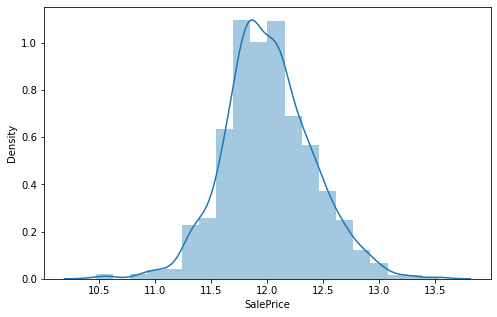

In [62]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(8,5))
sns.distplot(df.SalePrice, bins=20)
plt.show()

### Spliting and scaling

In [63]:
scaler=MinMaxScaler()

In [64]:
df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea', '2ndFlrSF','GrLivArea', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF','MoSold','SalePrice']]=scaler.fit_transform(df[[
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea','2ndFlrSF','GrLivArea', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF','MoSold','SalePrice']])

In [65]:
df.SalePrice.describe()

count    1400.000000
mean        0.503566
std         0.128681
min         0.000000
25%         0.423053
50%         0.494596
75%         0.582169
max         1.000000
Name: SalePrice, dtype: float64

In [66]:
X=df.drop(['SalePrice'],1)
y=df['SalePrice']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,random_state=100) # stratify issue

In [68]:
X_train.shape,y_train.shape

((979, 100), (979,))

In [69]:
X_test.shape,y_test.shape

((421, 100), (421,))

In [70]:
conv_corr = X_train.corr()

In [71]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

SaleType_New                SaleCondition_Partial               0.987958
Exterior1st_VinylSd         Exterior2nd_VinylSd                 0.975883
Exterior1st_MetalSd         Exterior2nd_MetalSd                 0.973025
Exterior1st_Wd Sdng         Exterior2nd_Wd Sdng                 0.847573
MSSubClass                  BldgType_OtherTypeDwell             0.818119
2ndFlrSF                    HouseStyle_2Story                   0.815170
                            GrLivArea                           0.708472
KitchenQual_TA              ExterQual_TA                        0.679435
Exterior1st_OtherExterior1  Exterior2nd_OtherExterior2metals    0.649410
SaleType_WD                 SaleCondition_Normal                0.645713
dtype: float64

In [72]:
# dropped highly correlated features

X_train=X_train.drop(["SaleType_New","Exterior1st_VinylSd","Exterior1st_MetalSd","Exterior1st_Wd Sdng"],1)
X_test = X_test.drop(["SaleType_New","Exterior1st_VinylSd","Exterior1st_MetalSd","Exterior1st_Wd Sdng"],1)

In [73]:
df.shape

(1400, 101)

In [74]:
numerical=df.select_dtypes(exclude=["object"])
categorical=df.select_dtypes(include=["object"])
print(numerical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=101)


## Linear Regression

In [75]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [76]:
rfe=RFE(reg,35)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=35)

In [77]:
y_pred = reg.predict(X)
y_pred

array([0.57986061, 0.52971953, 0.60456153, ..., 0.5925682 , 0.62893677,
       0.45689021])

In [78]:
r2_score(y,y_pred)

0.9168877647245873

In [79]:
# RSS= Mean Squared error * Total number of datapoint

rss= np.sum(np.square(y-y_pred))
print('Residual Sum of Squared: ', rss)

mse = mean_squared_error(y,y_pred)
print('Mean Squared Error: ', rss)

rmse = mse**0.5
print("Root Mean Squared Error: ",rmse)

Residual Sum of Squared:  1.925361528222524
Mean Squared Error:  1.925361528222524
Root Mean Squared Error:  0.03708447430454772


Text(0.5, 0, 'Errors')

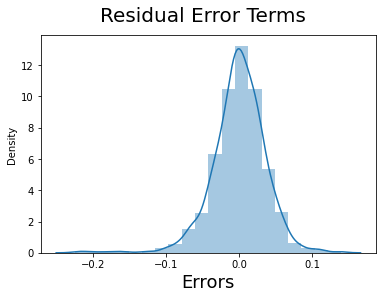

In [80]:
# Plot Residual Error
y_pred = reg.predict(X)
res=y-y_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18) 

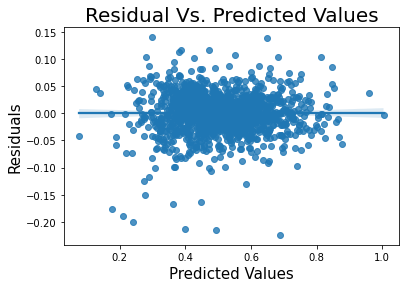

In [81]:
sns.regplot(x=y_pred, y=res)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [82]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 35 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,MasVnrArea,True,1
5,2ndFlrSF,True,1
6,GrLivArea,True,1
7,HalfBath,True,1
8,WoodDeckSF,True,1
9,OldOrNewGarage,True,1


In [83]:
# Assign the 35 columns to X_train_rfe
X_train_rfe = X_train[col]

In [84]:
# Associate the new 35 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building

### Ridge Regression

In [85]:
ridge=Ridge(.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [86]:
y_train_pred=ridge.predict(X_train)

r1=metrics.r2_score(y_train,y_train_pred)
r1

0.9109546888986255

In [87]:
y_test_pred=ridge.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
r2

0.891049207903285

#### Hyperparameter Tuning

In [88]:
folds=5
param={'alpha':[0.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,5,10,20,50,100]}
model=Ridge()
model_cv= GridSearchCV(estimator=model,
                      param_grid=param,
                      cv=folds,
                      scoring='neg_mean_absolute_error',
                      return_train_score=True, verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 5, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
model_cv.best_params_

{'alpha': 0.01}

In [90]:
ridge=Ridge(0.01)
ridge.fit(X_train,y_train)

y_train_pred=ridge.predict(X_train)
r1=metrics.r2_score(y_train,y_train_pred)
print("Ridge Train r2_score for optimal alpha: ",r1)

y_test_pred=ridge.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
print("Ridge Test r2_score for optimal alpha: ",r2)

Ridge Train r2_score for optimal alpha:  0.9109546888986255
Ridge Test r2_score for optimal alpha:  0.891049207903285


In [91]:
ridge.coef_

array([ 0.03726973,  0.06239277,  0.19714147,  0.11877147,  0.04421364,
       -0.09629188,  0.53392245,  0.0196984 ,  0.01410528,  0.01776224,
        0.03475949,  0.01581482,  0.03802817,  0.02565799,  0.0148259 ,
        0.02119181,  0.01055364, -0.02389413,  0.01509404, -0.01975004,
        0.03569648,  0.03893461, -0.01692422,  0.01979222,  0.03222245,
        0.02536258,  0.05560798, -0.01348681,  0.02445722,  0.02389025,
        0.02969651,  0.04793247,  0.03915765,  0.03496953,  0.04841842])

In [92]:
ridge.intercept_

-0.02759646500521029

In [93]:
# display the mean scores
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=100]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.01,-0.028290,-0.029850,1
0,0.001,-0.028288,-0.029851,2
2,0.1,-0.028318,-0.029862,3
3,0.2,-0.028380,-0.029911,4
4,0.3,-0.028462,-0.029998,5
5,0.4,-0.028557,-0.030097,6
6,0.5,-0.028658,-0.030200,7
7,0.6,-0.028764,-0.030308,8
8,0.7,-0.028871,-0.030416,9
9,0.8,-0.028980,-0.030526,10


In [94]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train: ", mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ", mse_test_lr)
metric2.append(mse_test_lr)

rmse_train_lr = mse_test_lr**0.5
print("RMSE_train: ", rmse_train_lr)
metric2.append(mse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("RMSE_test: ", rmse_train_lr)
metric2.append(rmse_train_lr)

r2_train:  0.9109546888986255
r2_test:  0.891049207903285
RSS_train:  1.471569284394287
RSS_test:  0.7182386761866744
MSE_train:  0.0015031351219553493
MSE_test:  0.001706030109707065
RMSE_train:  0.04130411734569648
RMSE_test:  0.04130411734569648


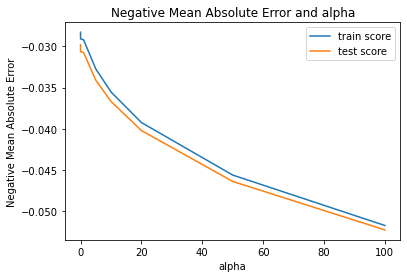

In [95]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [96]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotFrontage,0.0373
1,LotArea,0.0624
2,OverallQual,0.1971
3,OverallCond,0.1188
4,MasVnrArea,0.0442
5,2ndFlrSF,-0.0963
6,GrLivArea,0.5339
7,HalfBath,0.0197
8,WoodDeckSF,0.0141
9,OldOrNewGarage,0.0178


### Lasso Regression

In [97]:
lasso = Lasso(alpha=.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [98]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [99]:
r1= metrics.r2_score(y_train,y_train_pred)
r1

0.8800351982797188

In [100]:
r2= metrics.r2_score(y_test,y_test_pred)
r2

0.8737299393147168

In [101]:
folds=5
param={"alpha":[0.001,0.01,0.1,0.2,.03,.04, 0.5, 0.7, 0.9, 1,10,20,50,100]}
model=Lasso() 
model_cv = GridSearchCV(estimator=model,
                        param_grid=param, 
                        scoring='r2',
                        cv=folds,
                        return_train_score=True, verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.03, 0.04, 0.5, 0.7,
                                   0.9, 1, 10, 20, 50, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [102]:
model_cv.best_params_

{'alpha': 0.001}

In [103]:
lasso = Lasso(alpha=.001)
lasso.fit(X_train,y_train)

y_train_pred=lasso.predict(X_train)
r1=metrics.r2_score(y_train,y_train_pred)
print("Lasso train r2_score for optimal alpha value: ",r1)

y_test_pred=lasso.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
print("Lasso test r2_score for optimal alpha value: ",r2)

Lasso train r2_score for optimal alpha value:  0.8800351982797188
Lasso test r2_score for optimal alpha value:  0.8737299393147168


In [104]:
lasso.coef_

array([ 0.        ,  0.06929164,  0.26316407,  0.04284266,  0.        ,
       -0.        ,  0.32979276,  0.        ,  0.01008832,  0.01441089,
        0.04113266,  0.01200126,  0.02186061,  0.00821456, -0.0105575 ,
        0.02878232,  0.        , -0.01772046,  0.        , -0.00759222,
        0.01049063,  0.        , -0.0062329 ,  0.02077956,  0.03803758,
        0.02674167,  0.        ,  0.        ,  0.00458079,  0.02085155,
        0.        ,  0.        , -0.        ,  0.01167008,  0.02611297])

In [105]:
lasso.intercept_

0.08957777955039892

In [106]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test: ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train: ", mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ", mse_test_lr)
metric3.append(mse_test_lr)

rmse_train_lr = mse_test_lr**0.5
print("RMSE_train: ", rmse_train_lr)
metric3.append(mse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("RMSE_test: ", rmse_train_lr)
metric3.append(rmse_train_lr)

r2_train:  0.8800351982797188
r2_test:  0.8737299393147168
RSS_train:  1.9825470340491826
RSS_test:  0.8324128671602686
MSE_train:  0.0020250735792126484
MSE_test:  0.0019772277129697594
RMSE_train:  0.044466028751955794
RMSE_test:  0.044466028751955794


In [107]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003854,0.001649,0.001596,0.000491,0.001,{'alpha': 0.001},0.875661,0.880244,8.654215e-01,0.885276,0.853113,0.871943,0.011468,1,0.881098,0.879882,0.881768,0.878343,0.884338,0.881086,0.002001
1,0.002409,0.000511,0.001394,0.000489,0.010,{'alpha': 0.01},0.444039,0.422945,3.816358e-01,0.493433,0.445407,0.437492,0.036239,2,0.424769,0.459818,0.421902,0.469306,0.451537,0.445467,0.018946
2,0.002494,0.000597,0.001594,0.000486,0.100,{'alpha': 0.1},-0.001595,-0.000719,-3.186690e-07,-0.002673,-0.004393,-0.001876,0.001543,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002534,0.001234,0.001228,0.000394,0.200,{'alpha': 0.2},-0.001595,-0.000719,-3.186690e-07,-0.002673,-0.004393,-0.001876,0.001543,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004197,0.001318,0.002800,0.000986,0.030,{'alpha': 0.03},0.086912,0.109706,7.043512e-02,0.114084,0.101244,0.096476,0.015984,3,0.088041,0.115304,0.093896,0.102472,0.108079,0.101558,0.009734


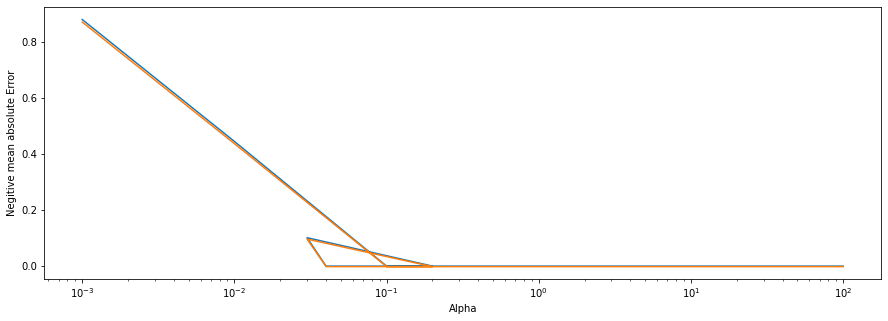

In [108]:
plt.figure(figsize=(15,5))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [109]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,GrLivArea,0.329793
3,OverallQual,0.263164
0,MSSubClass,0.089578
2,LotArea,0.069292
4,OverallCond,0.042843
11,MoSold,0.041133
25,ExterCond_Gd,0.038038
16,HeatingQC_Ex,0.028782
26,ExterCond_TA,0.026742
35,LotConfig_Inside,0.026113


In [110]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test","RMSE Train",'RMSE Test'],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.910955,0.880035
1,R2Score Test,0.891049,0.873730
2,RSS Train,1.471569,1.982547
3,RSS Test,0.718239,0.832413
4,MSE Train,0.001503,0.002025
5,MSE Test,0.001706,0.001977
6,RMSE Train,0.001503,0.002025
7,RMSE Test,0.041304,0.044466


#### R2 score of Ridge has almost 3% higher that the Lasso regression model.
#### But many of the coefficient values became 0 in the case of Lasso, so that it reduces the number of selected features and make the model simpler.
#### So we can say Lasso has a better edge over Ridge.

### Conclusion :

The optimal lambda/alpha value in case of Ridge and Lasso is as below: 

Ridge - 0.01 
Lasso - 0.001

The Mean Squared error of train data in case of Ridge and Lasso are: 

Ridge - 0.001503 
Lasso - 0.002025
    
The Mean Squared Error of ridge is slightly lower than that of lasso

Also, since Lasso helps in feature reduction (as the coefficient value of many features become 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality , condition of the house, Foundation type of the house, Total basement area in square feet,neighbourhood etc

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

----end of part 1----

### Subjective Question Solutions

### Question1:

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer:

In [111]:
ridge=Ridge(.02)
ridge.fit(X_train,y_train)

y_train_pred=ridge.predict(X_train)
r1=metrics.r2_score(y_train,y_train_pred)
print("Ridge Train r2_score for optimal alpha: ",r1)

y_test_pred=ridge.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
print("Ridge Test r2_score for optimal alpha: ",r2)

Ridge Train r2_score for optimal alpha:  0.9109530845515424
Ridge Test r2_score for optimal alpha:  0.8910929045162693


In [112]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train: ", mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ", mse_test_lr)
metric2.append(mse_test_lr)

rmse_train_lr = mse_test_lr**0.5
print("RMSE_train: ", rmse_train_lr)
metric2.append(mse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("RMSE_test: ", rmse_train_lr)
metric2.append(rmse_train_lr)

r2_train:  0.9109530845515424
r2_test:  0.8910929045162693
RSS_train:  1.471595797950808
RSS_test:  0.7179506140545897
MSE_train:  0.0015031622042398448
MSE_test:  0.0017053458766142274
RMSE_train:  0.04129583364716382
RMSE_test:  0.04129583364716382


In [113]:
# Put the Features and coefficienst in a dataframe

model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,HalfBath,0.532325
3,OverallCond,0.197368
4,MasVnrArea,0.118633
2,OverallQual,0.062616
27,FullBath_0/3FullBath,0.055617
32,SaleCondition_AdjLand,0.047726
5,2ndFlrSF,0.044345
33,SaleCondition_Normal,0.038987
22,Condition1_OtherCondition1,0.038942
13,KitchenQual_Gd,0.038083


In [114]:
lasso = Lasso(alpha=.002)
lasso.fit(X_train,y_train)

y_train_pred=lasso.predict(X_train)
r1=metrics.r2_score(y_train,y_train_pred)
print("Lasso train r2_score for optimal alpha value: ",r1)

y_test_pred=lasso.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
print("Lasso test r2_score for optimal alpha value: ",r2)

Lasso train r2_score for optimal alpha value:  0.8447925267581855
Lasso test r2_score for optimal alpha value:  0.8432583685663015


In [115]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test: ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train: ", mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ", mse_test_lr)
metric3.append(mse_test_lr)

rmse_train_lr = mse_test_lr**0.5
print("RMSE_train: ", rmse_train_lr)
metric3.append(mse_train_lr)

rmse_test_lr = mse_test_lr**0.5
print("RMSE_test: ", rmse_train_lr)
metric3.append(rmse_train_lr)

r2_train:  0.8447925267581855
r2_test:  0.8432583685663015
RSS_train:  2.564969985573746
RSS_test:  1.0332912656967603
MSE_train:  0.0026199897707596996
MSE_test:  0.0024543735527238963
RMSE_train:  0.049541634538273926
RMSE_test:  0.049541634538273926


In [116]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
3,OverallQual,0.276426
7,GrLivArea,0.268267
0,MSSubClass,0.166523
2,LotArea,0.047853
11,MoSold,0.038690
25,ExterCond_Gd,0.037083
16,HeatingQC_Ex,0.030336
26,ExterCond_TA,0.023801
24,KitchenQual_TA,0.023105
30,MSZoning_RL,0.014555


In [117]:
resultTable = {'Metric':["R2 Score Train", "R2 Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test", "RMSE Train","RMSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.910953,0.844793
1,R2 Score Test,0.891093,0.843258
2,RSS Train,1.471596,2.564970
3,RSS Test,0.717951,1.033291
4,MSE Train,0.001503,0.002620
5,MSE Test,0.001705,0.002454
6,RMSE Train,0.001503,0.002620
7,RMSE Test,0.041296,0.049542


In [118]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0479
1,OverallQual,0.2764
2,GrLivArea,0.2683
3,WoodDeckSF,0.0016
4,OldOrNewGarage,0.0131
5,BsmtQual_Ex,0.0387
6,BsmtQual_Gd,0.0083
7,KitchenQual_Ex,0.0063
8,KitchenQual_TA,-0.0252
9,MSZoning_RL,0.0303


In [119]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer:

In [120]:
dfLasso = df
dfLasso = dfLasso.drop(['GrLivArea','OverallQual','MSSubClass','LotArea','OverallCond'],axis=1)

In [121]:
df_train, df_test = train_test_split(dfLasso, train_size=0.7, random_state=100)


In [122]:
num_col =['LotFrontage', 'MasVnrArea', '2ndFlrSF', 'HalfBath','WoodDeckSF', 'OpenPorchSF','MoSold']

scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [123]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [124]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 35)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [125]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,MasVnrArea,True,1
2,2ndFlrSF,True,1
3,OpenPorchSF,True,1
4,BsmtQual_Ex,True,1
5,BsmtQual_Gd,True,1
6,BsmtQual_TA,True,1
7,KitchenQual_Ex,True,1
8,KitchenQual_Gd,True,1
9,KitchenQual_TA,True,1


In [126]:
# Assign the 35 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 35 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

#### Perform LAsso to new model after dropping the five imp features

In [127]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.786461304172551
0.7796714509847087


In [128]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print('Train R2 Score: ', r2_train_lr)

r2_test_lr = r2_score(y_testLS, y_test_predLS)
print('Test R2 Score: ', r2_test_lr)

rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print('Train RSS: ', rss1_lr)

rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print('Test RSS: ',rss2_lr)

mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print('Test MSE: ',mse_test_lr)

Train R2 Score:  0.786461304172551
Test R2 Score:  0.7796714509847087
Train RSS:  3.528956010401741
Test RSS:  1.4524766853498163
Train MSE:  0.0036046537389190407
Test MSE:  0.0034500633856290176


In [129]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)
#(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"]#

,Featuere,Coef
0,LotFrontage,0.265415
8,BuiltOrRemodelAge,0.093460
5,OpenPorchSF,0.078882
3,HalfBath,0.074549
19,ExterCond_Gd,0.067562
1,MasVnrArea,0.064911
2,2ndFlrSF,0.062748
23,BsmtCond_TA,0.061476
26,LotShape_Reg,0.046366
9,OldOrNewGarage,0.042374


After removing the five most important fetaure that we have got prior 'GrLivArea','OverallQual','MSSubClass','LotArea','OverallCond', I have got the other important fetaures to predict the sales price with "LotFrontage", "OpenPorch", "HalfBath", "ExternalCond", "IsRemodeled".

--end with part 2----